#  PROJECT OVERVIEW 


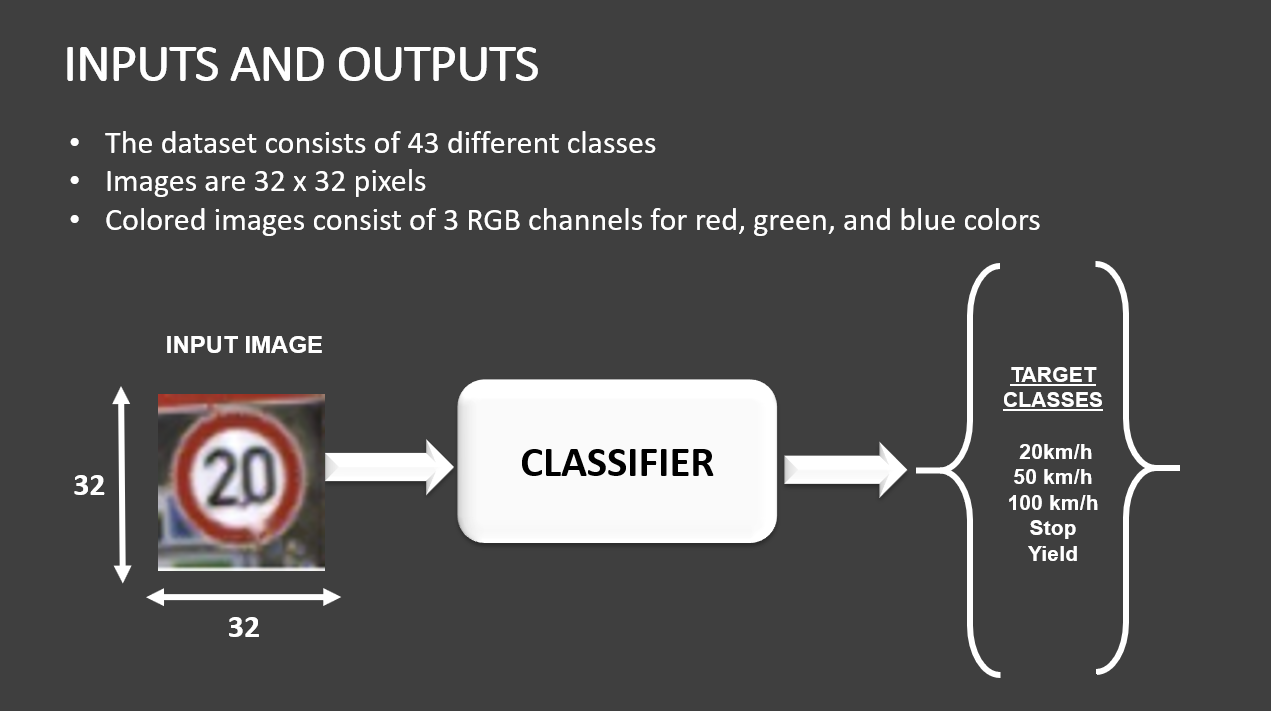

#  IMPORT LIBRARIES/DATASETS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

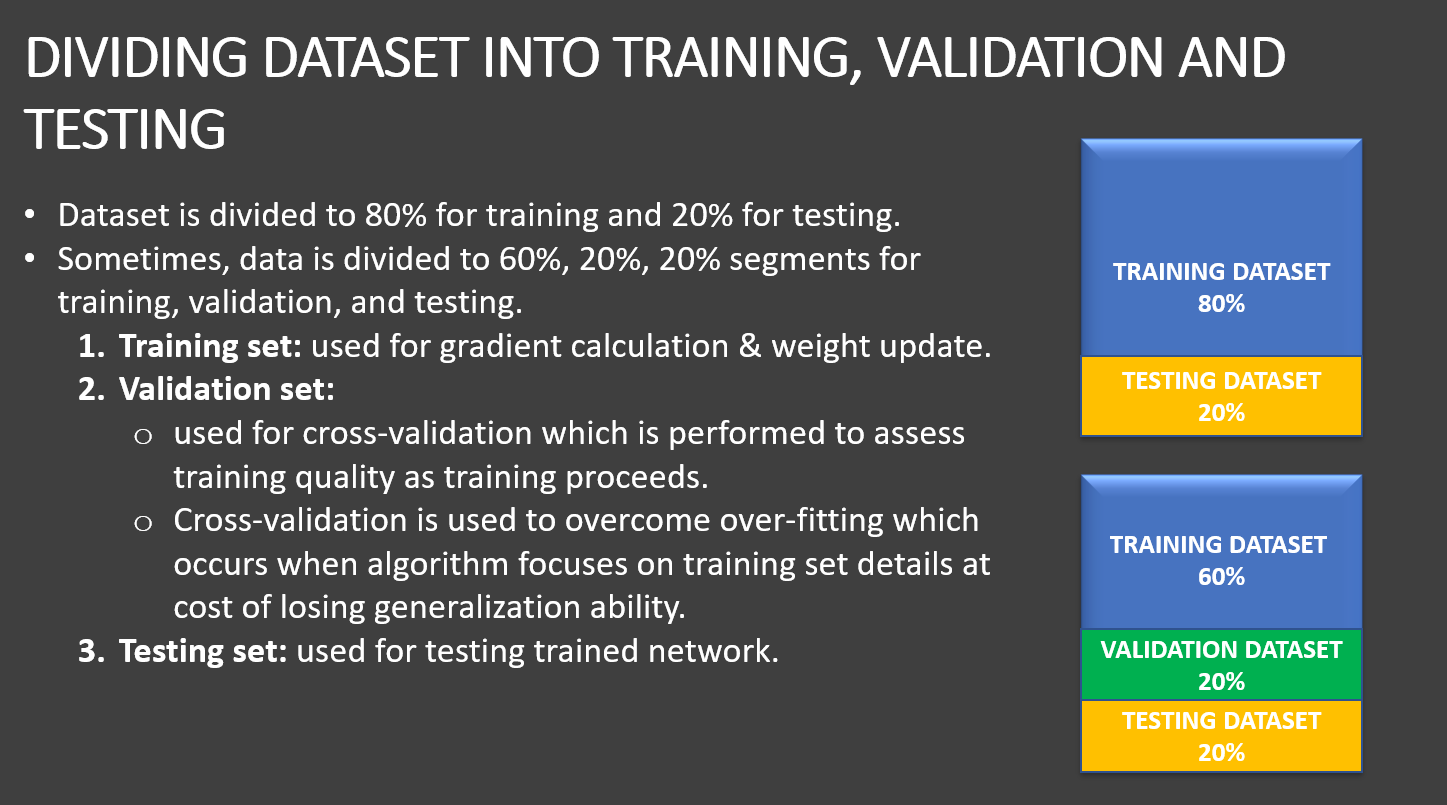

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_val, y_val = valid['features'], valid['labels']

In [7]:
X_val.shape

(4410, 32, 32, 3)

In [8]:
y_val.shape

(4410,)

In [9]:
X_test, y_test = test['features'], test['labels']

In [10]:
X_test.shape

(12630, 32, 32, 3)

In [11]:
y_test.shape

(12630,)

#  PERFORM IMAGES VISUALIZATION

29

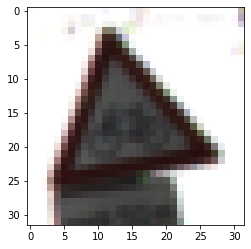

In [12]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

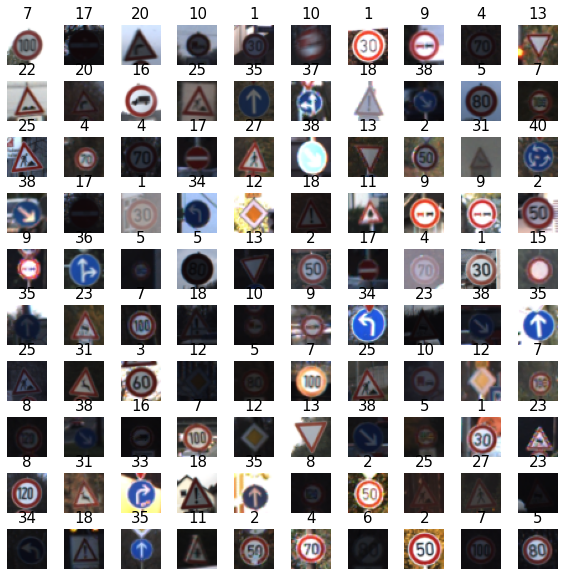

In [13]:

W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

for i in np.arange(0, W_grid*L_grid):
    index = np.random.randint(0, n_training)   
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

        

#  CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [14]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [15]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_val_gray = np.sum(X_val/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

In [16]:
X_train_gray.shape

(34799, 32, 32, 1)

In [17]:
X_train_gray_norm = (X_train_gray - 128)/128
X_val_gray_norm = (X_val_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128

In [18]:
X_train_gray_norm

array([[[[-0.63802083],
         [-0.6328125 ],
         [-0.63541667],
         ...,
         [-0.75260417],
         [-0.71875   ],
         [-0.71354167]],

        [[-0.640625  ],
         [-0.63020833],
         [-0.62239583],
         ...,
         [-0.72916667],
         [-0.69791667],
         [-0.70572917]],

        [[-0.63541667],
         [-0.63802083],
         [-0.65364583],
         ...,
         [-0.734375  ],
         [-0.70572917],
         [-0.72916667]],

        ...,

        [[-0.8671875 ],
         [-0.84895833],
         [-0.84114583],
         ...,
         [-0.77083333],
         [-0.76302083],
         [-0.75520833]],

        [[-0.81770833],
         [-0.73177083],
         [-0.734375  ],
         ...,
         [-0.76822917],
         [-0.76302083],
         [-0.75520833]],

        [[-0.7265625 ],
         [-0.52864583],
         [-0.53645833],
         ...,
         [-0.765625  ],
         [-0.76041667],
         [-0.74739583]]],


       [[[-0.8984375 ],


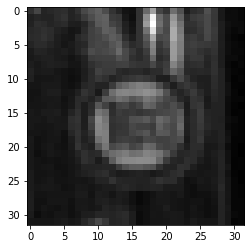

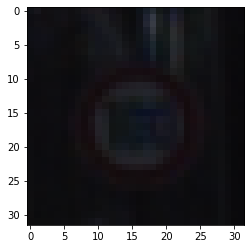

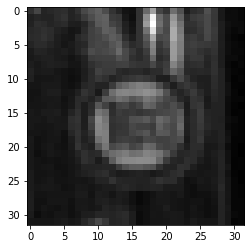

In [19]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

#  CONVOLUTIONAL NEURAL NETWORKS 

In [20]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation = 'relu', input_shape = (32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5, 5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))

CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

#  COMPILE AND TRAIN DEEP CNN MODEL

In [21]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = CNN.fit(X_train_gray_norm,
                 y_train,
                 batch_size = 128,
                 epochs = 25,
                 verbose = 1,
                 validation_data = (X_val_gray_norm, y_val))

Train on 34799 samples, validate on 4410 samples
Epoch 1/25
34799/34799 [==============================] - 28s 803us/sample - loss: 2.1283 - accuracy: 0.4191 - val_loss: 1.0918 - val_accuracy: 0.6683
Epoch 2/25
34799/34799 [==============================] - 27s 769us/sample - loss: 0.8005 - accuracy: 0.7636 - val_loss: 0.7698 - val_accuracy: 0.7687
Epoch 3/25
34799/34799 [==============================] - 27s 784us/sample - loss: 0.5376 - accuracy: 0.8420 - val_loss: 0.5778 - val_accuracy: 0.8279
Epoch 4/25
34799/34799 [==============================] - 28s 792us/sample - loss: 0.4016 - accuracy: 0.8823 - val_loss: 0.5414 - val_accuracy: 0.8392
Epoch 5/25
34799/34799 [==============================] - 27s 786us/sample - loss: 0.3168 - accuracy: 0.9086 - val_loss: 0.4895 - val_accuracy: 0.8603
Epoch 6/25
34799/34799 [==============================] - 27s 786us/sample - loss: 0.2554 - accuracy: 0.9250 - val_loss: 0.4326 - val_accuracy: 0.8776
Epoch 7/25
34799/34799 [=====================

#  ASSESS TRAINED CNN MODEL PERFORMANCE 

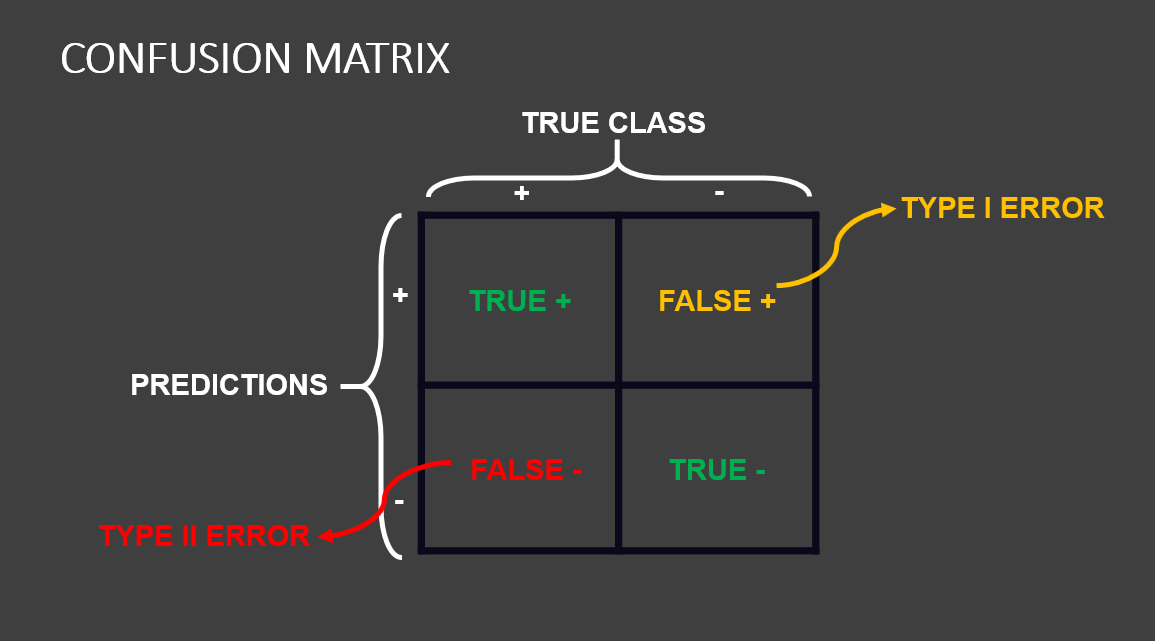

In [28]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 5s 418us/sample - loss: 0.6236 - accuracy: 0.9091
Test Accuracy: 0.9091053009033203


In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Train and val loss')

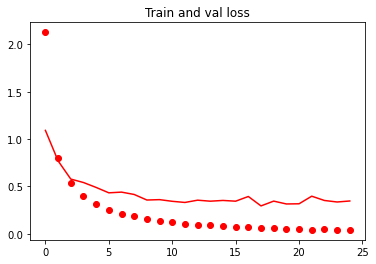

In [33]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Train and val loss')

Text(0.5, 1.0, 'Train and val accuracy')

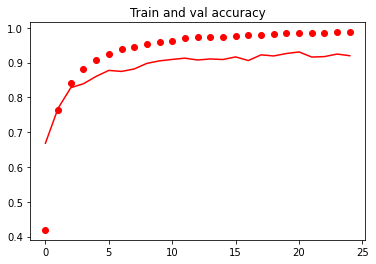

In [34]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Train and val accuracy')

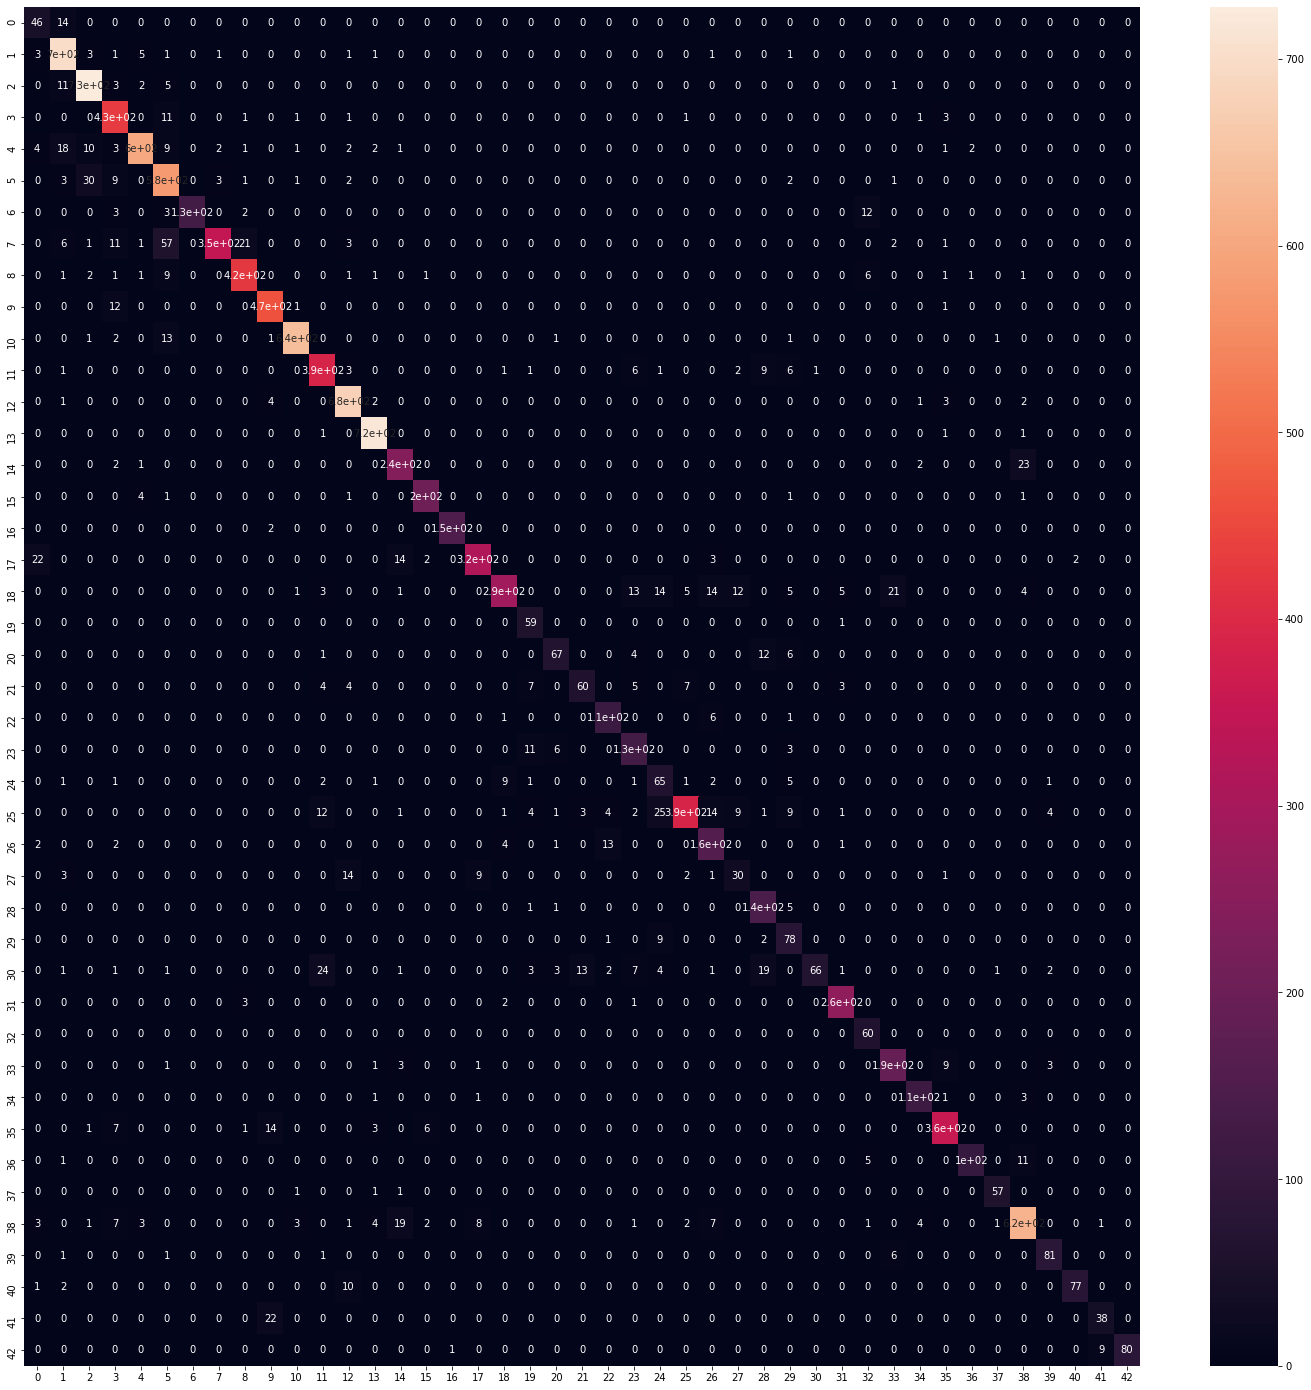

In [35]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

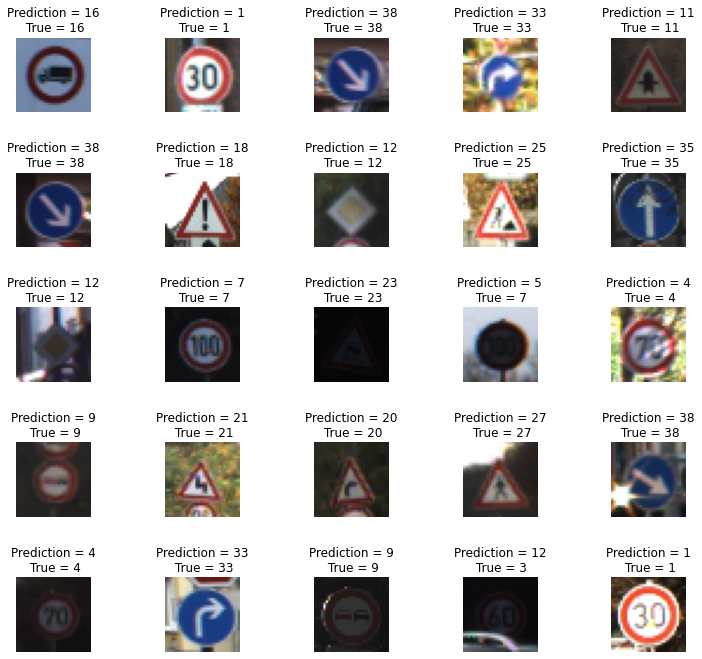

In [36]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons
